In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_sample_image

In [3]:
china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [4]:
%matplotlib inline

In [5]:
import matplotlib
import matplotlib.pyplot as plt

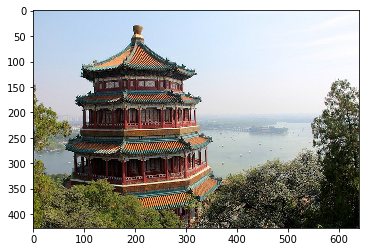

In [6]:
plt.imshow(china)

In [7]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1

In [8]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding='SAME')

In [10]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

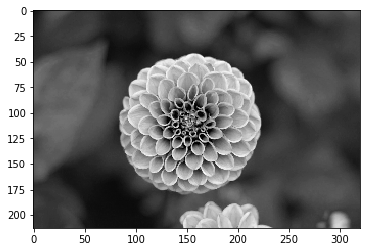

In [20]:
plt.imshow(output[1, :, :, 1], cmap='gray')

In [12]:
output.shape

(2, 214, 320, 2)

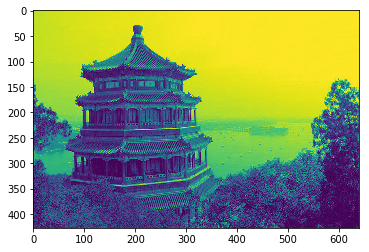

In [13]:
plt.imshow(china[:, :, 2])

In [15]:
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [16]:
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

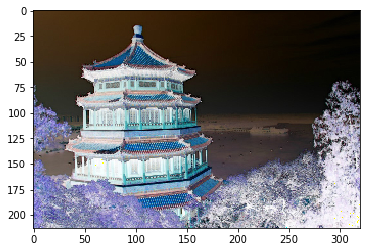

In [18]:
plt.imshow(output[0])

In [22]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')

In [36]:
data, label = mnist['data'], mnist['target']

In [37]:
X_train, X_test, y_train, y_test = data[:60000], data[60000:], label[:60000], label[60000:]

In [51]:
import numpy as np

In [53]:
n_inputs = 28*28

X_train = np.reshape(X_train, newshape=(-1, 28, 28, 1))
with tf.name_scope('inputs'):
    X = tf.placeholder(tf.float32, shape = (None, 28, 28, 1), name='X')
    y = tf.placeholder(tf.float32, shape=(None), name='y')

In [59]:
with tf.name_scope('conv'):
    conv1 = tf.layers.conv2d(tf.cast(X_input, tf.float32), filters=6, kernel_size=7, strides=2)
    pooling1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.layers.conv2d(pooling1, filters=2, kernel_size=5, strides=2)
    pooling2 = tf.nn.max_pool(conv2, ksize=[1, 1, 1, 1], strides=[1, 1, 1, 1], padding='VALID')

    

In [60]:
X_train.shape

(60000, 28, 28, 1)

In [64]:
init = tf.global_variables_initializer()

test = X_train[:2, :, :, :]
with tf.Session() as sess:
    init.run()
    output = sess.run(pooling2, feed_dict={X: test})
    

In [66]:
output.shape

(60000, 1, 1, 2)

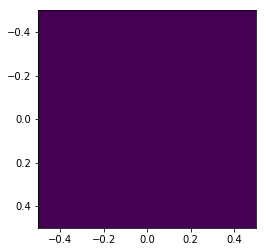

In [70]:
plt.imshow(output[10000,:,:, 1])